<h1>Import frameworks</h1>

In [2]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns


<h1>Read csv</h1>

The variable 'Human Development Index (value)' has the strongest correlation with a coefficient of 0.93.


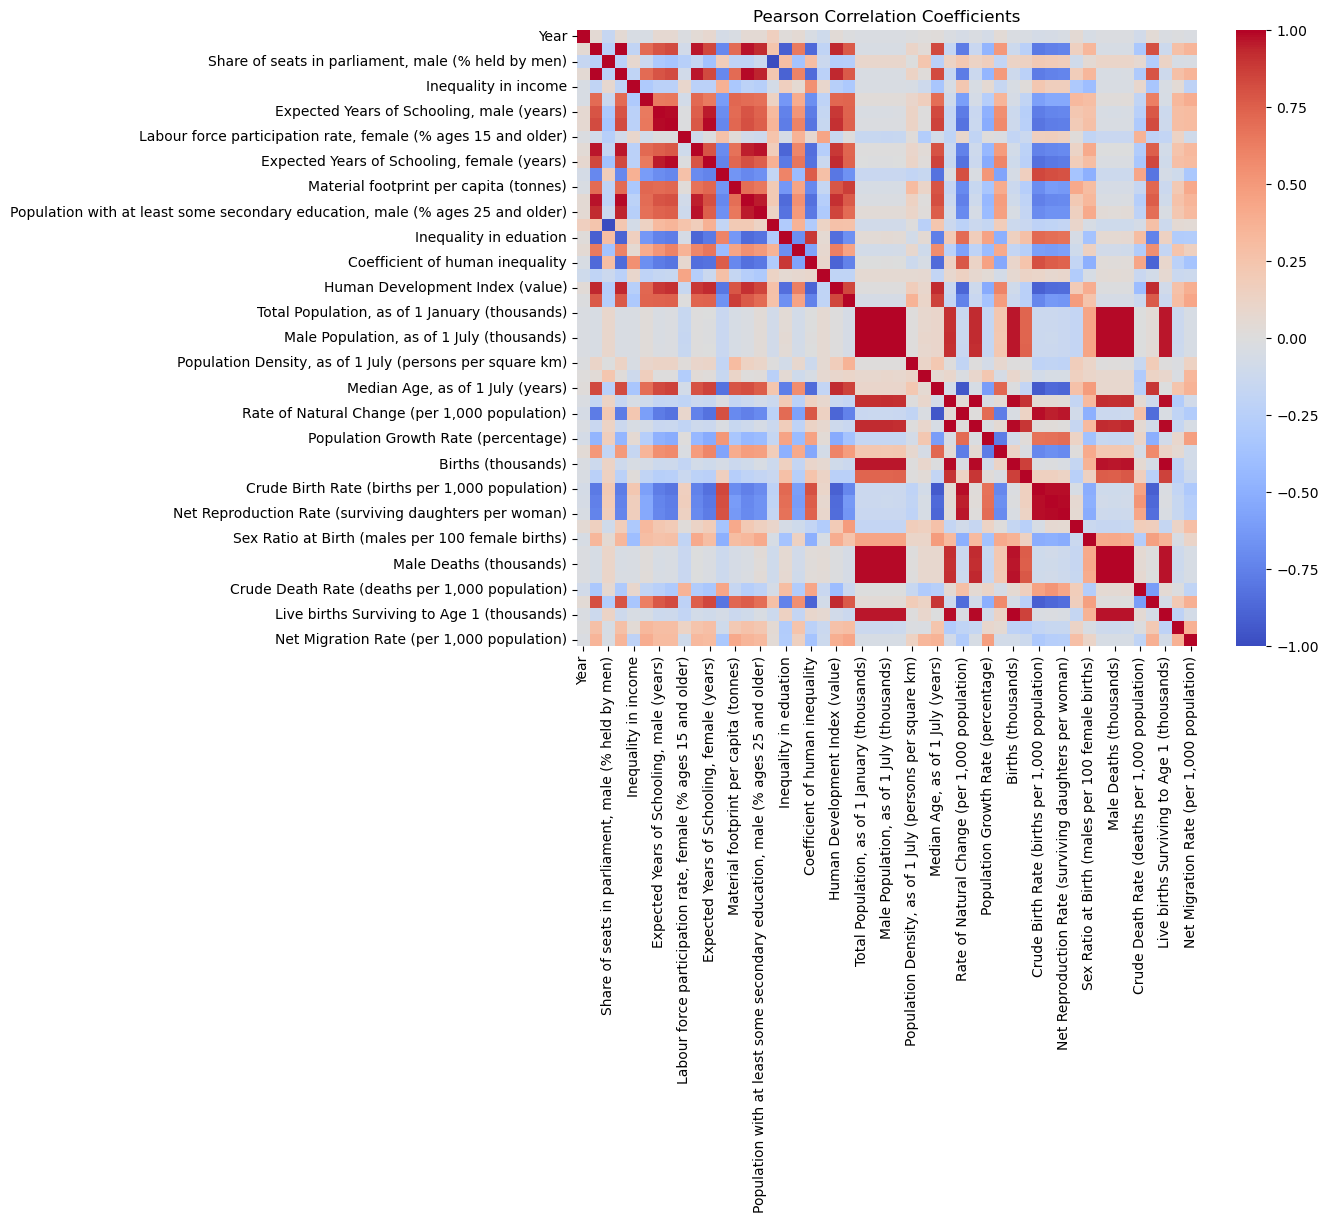

In [3]:
file_path = "../life_expectancy.csv"  
life_expectancy = pd.read_csv(file_path,  sep=',',).dropna()
#print(life_expectancy.head())

life_expectancy.set_index('Country', inplace=True)


X = life_expectancy.drop('Life Expectancy at Birth, both sexes (years)', axis=1)  # Features
y = life_expectancy['Life Expectancy at Birth, both sexes (years)']  # Target variable

# Split the dataset into training and test sets
# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Compute Pearson correlation coefficients
correlation_matrix = life_expectancy.corr()

# Extract correlation coefficients of the target variable (life expectancy)
correlation_with_life_expectancy = correlation_matrix['Life Expectancy at Birth, both sexes (years)']
# Remove the target variable from the correlation coefficients
correlation_without_life_expectancy = correlation_with_life_expectancy.drop('Life Expectancy at Birth, both sexes (years)')

# Find the variable with the highest absolute correlation coefficient
strongest_correlation_variable = correlation_without_life_expectancy.abs().idxmax()
strongest_correlation_coefficient = correlation_without_life_expectancy.abs().max()

print(f"The variable '{strongest_correlation_variable}' has the strongest correlation with a coefficient of {strongest_correlation_coefficient:.2f}.")


pyplot.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
pyplot.title('Pearson Correlation Coefficients')
pyplot.show()
